## VGG16

In [ ]:
#importing other required libraries
import numpy as np
import pandas as pd
from sklearn.utils.multiclass import unique_labels
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import itertools
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras import Sequential
from tensorflow.keras.applications import ResNet50
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD,Adam
from keras.callbacks import ReduceLROnPlateau
from keras.layers import Flatten, Dense, BatchNormalization, Activation, Dropout
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
import random

In [ ]:
#Keras library for CIFAR dataset
from keras.datasets import cifar10
(x_train, y_train),(x_test, y_test)=cifar10.load_data()

/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


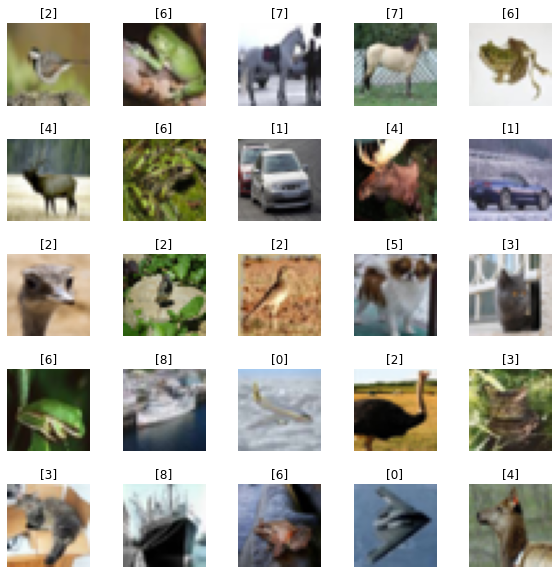

In [ ]:
W_grid=5
L_grid=5
fig,axes = plt.subplots(L_grid,W_grid,figsize=(10,10))
axes=axes.ravel()
n_training=len(x_train)
for i in np.arange(0,L_grid * W_grid):
    index=np.random.randint(0,n_training) 
    axes[i].imshow(x_train[index])
    axes[i].set_title(y_train[index]) 
    axes[i].axis('off')
plt.subplots_adjust(hspace=0.4)

In [ ]:
import tensorflow
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Model
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.layers import Dense, Dropout, Flatten

In [ ]:
#Keras library for CIFAR dataset
from keras.datasets import cifar10
(x_train, y_train),(x_test, y_test)=cifar10.load_data()

170508288/170498071 [==============================] - 3s 0us/step


In [ ]:
#Train-validation-test split
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=.3)

In [ ]:
#Dimension of the CIFAR10 dataset
print((x_train.shape,y_train.shape))
print((x_val.shape,y_val.shape))
print((x_test.shape,y_test.shape))

((35000, 32, 32, 3), (35000, 1))
((15000, 32, 32, 3), (15000, 1))
((10000, 32, 32, 3), (10000, 1))


In [ ]:
#Onehot Encoding the labels.
#Since we have 10 classes we should expect the shape[1] of y_train,y_val and y_test to change from 1 to 10
from tensorflow.keras.utils import to_categorical
y_train=to_categorical(y_train)
y_val=to_categorical(y_val)
y_test=to_categorical(y_test)

In [ ]:
#Verifying the dimension after one hot encoding
print((x_train.shape,y_train.shape))
print((x_val.shape,y_val.shape))
print((x_test.shape,y_test.shape))

((35000, 32, 32, 3), (35000, 10))
((15000, 32, 32, 3), (15000, 10))
((10000, 32, 32, 3), (10000, 10))


In [ ]:
#Image Data Augmentation
train_generator = ImageDataGenerator(rotation_range=2, 
                                     horizontal_flip=True, zoom_range=.1 )

val_generator = ImageDataGenerator(rotation_range=2, horizontal_flip=True,zoom_range=.1)

test_generator = ImageDataGenerator(rotation_range=2,  horizontal_flip= True, zoom_range=.1)

#Fitting the augmentation defined above to the data
train_generator.fit(x_train)
val_generator.fit(x_val)
test_generator.fit(x_test)

In [ ]:
#Learning Rate Annealer
from keras.callbacks import ReduceLROnPlateau
lrr= ReduceLROnPlateau(monitor='val_acc', factor=.01,  patience=3, min_lr=1e-5)

In [ ]:
from keras.applications.vgg16 import VGG16
from keras.layers import GlobalAveragePooling2D
base_model=VGG16(input_shape=(32,32,3),include_top=False,weights='imagenet')

58900480/58889256 [==============================] - 0s 0us/step


In [ ]:
x=base_model.output
x=GlobalAveragePooling2D()(x)

for layer in base_model.layers:
  layer.trainable=False

In [ ]:
x=base_model.output
from keras.models import Model
from keras.layers import Flatten, Dense
x=Flatten()(x)
x=Dense(512,activation='relu')(x)
predictions=Dense(10,activation='softmax')(x)
model_final=Model(base_model.input,predictions)

In [ ]:
from tensorflow.keras.utils import plot_model
#plot_model(vgg_model,to_file="model.png",show_shapes=True,show_layer_names=True)

In [ ]:
x_train.shape

(35000, 32, 32, 3)

In [ ]:
from tensorflow.keras.optimizers import SGD,Adam
import tensorflow as tf
model_final.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics = ['acc'])

In [ ]:
#Learning Rate Annealer
lrr= ReduceLROnPlateau(monitor='val_acc', factor=.01,  patience=3, min_lr=1e-5)

In [ ]:
#base_model.fit_generator(train_generator.flow(x_train, y_train, batch_size = 32), epochs=10, steps_per_epoch = x_train.shape[0]//32, validation_data = val_generator.flow(x_val, y_val, batch_size = 32), validation_steps = 250, callbacks = [lrr], verbose = 1)

model_final.fit_generator(train_generator.flow(x_train, y_train, batch_size = 32)
, epochs=10, steps_per_epoch = 10, 
validation_data = val_generator.flow(x_val, y_val, batch_size = 32), validation_steps = 250, callbacks = [lrr], verbose = 1)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


10/10 [==============================] - 96s 10s/step - loss: 15.6028 - acc: 0.1719 - val_loss: 10.8744 - val_acc: 0.2884 - lr: 0.0010
Epoch 2/10
10/10 [==============================] - 93s 10s/step - loss: 9.8118 - acc: 0.3344 - val_loss: 8.5052 - val_acc: 0.3545 - lr: 0.0010
Epoch 3/10
10/10 [==============================] - 92s 10s/step - loss: 8.7263 - acc: 0.3406 - val_loss: 7.6809 - val_acc: 0.3780 - lr: 0.0010
Epoch 4/10
10/10 [==============================] - 93s 10s/step - loss: 8.0335 - acc: 0.3656 - val_loss: 7.1156 - val_acc: 0.3796 - lr: 0.0010
Epoch 5/10
10/10 [==============================] - 93s 10s/step - loss: 6.7378 - acc: 0.3562 - val_loss: 6.9897 - val_acc: 0.3766 - lr: 0.0010
Epoch 6/10
10/10 [==============================] - 93s 10s/step - loss: 7.3854 - acc: 0.3656 - val_loss: 6.8000 - val_acc: 0.3664 - lr: 0.0010
Epoch 7/10
10/10 [==============================] - 93s 10s/step - loss: 6.4242 - acc: 0.3969 - val_loss: 6.3630 - val_acc: 0.3988 - lr: 0.0010
E

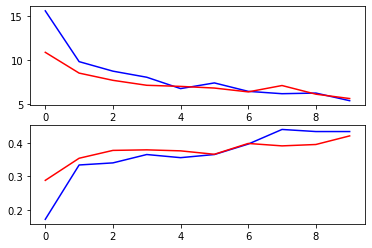

In [ ]:
#Plotting the training and validation loss
f,ax=plt.subplots(2,1) #Creates 2 subplots under 1 column
#Training loss and validation loss
ax[0].plot(model_final.history.history['loss'],color='b',label='Training Loss')
ax[0].plot(model_final.history.history['val_loss'],color='r',label='Validation Loss')
#Training accuracy and validation accuracy
ax[1].plot(model_final.history.history['acc'],color='b',label='Training  Accuracy')
ax[1].plot(model_final.history.history['val_acc'],color='r',label='Validation Accuracy')

In [ ]:
#Defining function for confusion matrix plot
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Computing confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

# Visualizing
    fig, ax = plt.subplots(figsize=(7,7))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

   # Rotating the tick labels and setting their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    # Looping over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax
np.set_printoptions(precision=2)

In [ ]:
#Making prediction
y_pred1 = model_final.predict(x_test)
y_true = np.argmax(y_test,axis=1)

In [ ]:
y_pred2 = np.argmax(y_pred1,axis=1)

Confusion matrix, without normalization


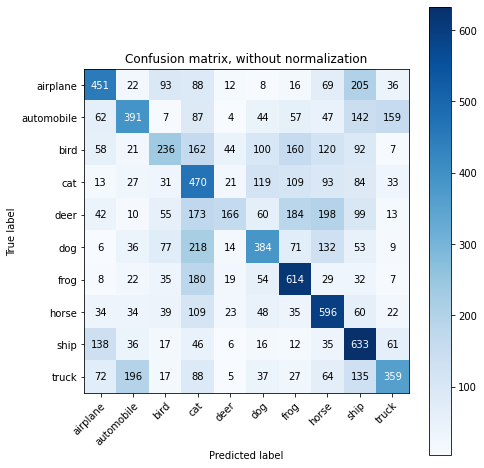

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
#Plotting the confusion matrix
confusion_mtx = confusion_matrix(y_true, y_pred2)

#Defining the class label
class_names=['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Plotting non-normalized confusion matrix
plot_confusion_matrix(y_true, y_pred2, classes = class_names, title='Confusion matrix, without normalization')

In [ ]:

print('Classification Report')
print(classification_report(y_true, y_pred2, target_names=class_names))

Classification Report
              precision    recall  f1-score   support

    airplane       0.51      0.45      0.48      1000
  automobile       0.49      0.39      0.44      1000
        bird       0.39      0.24      0.29      1000
         cat       0.29      0.47      0.36      1000
        deer       0.53      0.17      0.25      1000
         dog       0.44      0.38      0.41      1000
        frog       0.48      0.61      0.54      1000
       horse       0.43      0.60      0.50      1000
        ship       0.41      0.63      0.50      1000
       truck       0.51      0.36      0.42      1000

    accuracy                           0.43     10000
   macro avg       0.45      0.43      0.42     10000
weighted avg       0.45      0.43      0.42     10000



## ResNet50

In [ ]:

from tensorflow.keras.applications import ResNet50

base_model = ResNet50(input_shape=(32, 32,3), include_top=False, weights="imagenet")

In [ ]:
#Keras library for CIFAR dataset
from keras.datasets import cifar10
(x_train, y_train),(x_test, y_test)=cifar10.load_data()

In [ ]:
#Train-validation-test split
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=.3)

In [ ]:
#Dimension of the CIFAR10 dataset
print((x_train.shape,y_train.shape))
print((x_val.shape,y_val.shape))
print((x_test.shape,y_test.shape))

((35000, 32, 32, 3), (35000, 1))
((15000, 32, 32, 3), (15000, 1))
((10000, 32, 32, 3), (10000, 1))


In [ ]:
#Onehot Encoding the labels.
#Since we have 10 classes we should expect the shape[1] of y_train,y_val and y_test to change from 1 to 10
y_train=to_categorical(y_train)
y_val=to_categorical(y_val)
y_test=to_categorical(y_test)

In [ ]:
#Verifying the dimension after one hot encoding
print((x_train.shape,y_train.shape))
print((x_val.shape,y_val.shape))
print((x_test.shape,y_test.shape))

((35000, 32, 32, 3), (35000, 10))
((15000, 32, 32, 3), (15000, 10))
((10000, 32, 32, 3), (10000, 10))


In [ ]:
#Image Data Augmentation
train_generator = ImageDataGenerator(rotation_range=2, 
                                     horizontal_flip=True, zoom_range=.1 )

val_generator = ImageDataGenerator(rotation_range=2, horizontal_flip=True,zoom_range=.1)

test_generator = ImageDataGenerator(rotation_range=2,  horizontal_flip= True, zoom_range=.1)

#Fitting the augmentation defined above to the data
train_generator.fit(x_train)
val_generator.fit(x_val)
test_generator.fit(x_test)

In [ ]:
#Learning Rate Annealer
from keras.callbacks import ReduceLROnPlateau
lrr= ReduceLROnPlateau(monitor='val_acc', factor=.01,  patience=3, min_lr=1e-5)

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten,GlobalAveragePooling2D

base_model = Sequential()
base_model.add(ResNet50(include_top=False, weights='imagenet', pooling='max'))
base_model.add(Dense(10, activation='softmax'))

In [ ]:
from tensorflow.keras.optimizers import SGD,Adam
import tensorflow as tf
#ss=SGD(lr=0.0001)
base_model.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics = ['acc'])

In [ ]:
#Learning Rate Annealer
lrr= ReduceLROnPlateau(monitor='val_acc', factor=.01,  patience=3, min_lr=1e-5)

In [ ]:


base_model.fit_generator(train_generator.flow(x_train, y_train, batch_size = 32)
, epochs=10, steps_per_epoch = 10, 
validation_data = val_generator.flow(x_val, y_val, batch_size = 32), validation_steps = 250, callbacks = [lrr], verbose = 1)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1963: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
10/10 [==============================] - 13s 712ms/step - loss: 3.1069 - acc: 0.2313 - val_loss: 23.4654 - val_acc: 0.1040
Epoch 2/10
10/10 [==============================] - 6s 710ms/step - loss: 3.7901 - acc: 0.2156 - val_loss: 103.3958 - val_acc: 0.1001
Epoch 3/10
10/10 [==============================] - 6s 631ms/step - loss: 3.3411 - acc: 0.2656 - val_loss: 38.1079 - val_acc: 0.1316
Epoch 4/10
10/10 [==============================] - 6s 626ms/step - loss: 2.6790 - acc: 0.3469 - val_loss: 399.1526 - val_acc: 0.1009
Epoch 5/10
10/10 [==============================] - 6s 616ms/step - loss: 2.7243 - acc: 0.2906 - val_loss: 27.0941 - val_acc: 0.0911
Epoch 6/10
10/10 [==============================] - 6s 629ms/step - loss: 2.1730 - acc: 0.3531 - val_loss: 10.6281 - val_acc: 0.1328
Epoch 7/10
10/10 [==============================] - 6s 621ms/step - loss: 2.3769 - acc: 0.3562 - val_loss: 7.7993 - val_acc: 0.1429
Epoch 8/10
10/10 [==============================] - 6s 612ms/step -

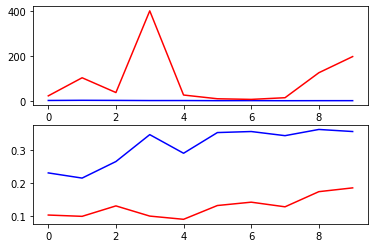

In [ ]:
#Plotting the training and validation loss
f,ax=plt.subplots(2,1) #Creates 2 subplots under 1 column
#Training loss and validation loss
ax[0].plot(base_model.history.history['loss'],color='b',label='Training Loss')
ax[0].plot(base_model.history.history['val_loss'],color='r',label='Validation Loss')
#Training accuracy and validation accuracy
ax[1].plot(base_model.history.history['acc'],color='b',label='Training  Accuracy')
ax[1].plot(base_model.history.history['val_acc'],color='r',label='Validation Accuracy')

In [ ]:
#Defining function for confusion matrix plot
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Computing confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

# Visualizing
    fig, ax = plt.subplots(figsize=(7,7))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

   # Rotating the tick labels and setting their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    # Looping over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax
np.set_printoptions(precision=2)

In [ ]:
#Making prediction
y_pred1 = base_model.predict_classes(x_test)
y_true = np.argmax(y_test,axis=1)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:454: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
y_true

array([3, 8, 8, ..., 5, 1, 7])

Confusion matrix, without normalization


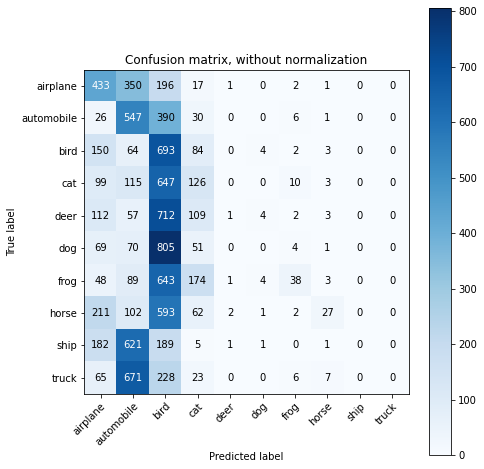

In [ ]:
#Plotting the confusion matrix
confusion_mtx = confusion_matrix(y_true, y_pred1)

#Defining the class labels
class_names=['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Plotting non-normalized confusion matrix
plot_confusion_matrix(y_true, y_pred1, classes = class_names, title='Confusion matrix, without normalization')

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print('Classification Report')
print(classification_report(y_true, y_pred1, target_names=class_names))

Classification Report
              precision    recall  f1-score   support

    airplane       0.31      0.43      0.36      1000
  automobile       0.20      0.55      0.30      1000
        bird       0.14      0.69      0.23      1000
         cat       0.19      0.13      0.15      1000
        deer       0.17      0.00      0.00      1000
         dog       0.00      0.00      0.00      1000
        frog       0.53      0.04      0.07      1000
       horse       0.54      0.03      0.05      1000
        ship       0.00      0.00      0.00      1000
       truck       0.00      0.00      0.00      1000

    accuracy                           0.19     10000
   macro avg       0.21      0.19      0.12     10000
weighted avg       0.21      0.19      0.12     10000



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## InceptionV3

In [ ]:
import tensorflow
import matplotlib.pyplot as plt
from keras.models import Model
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.layers import Dense, Dropout, Flatten

In [ ]:
#Keras library for CIFAR dataset
from keras.datasets import cifar10
(x_train, y_train),(x_test, y_test)=cifar10.load_data()

In [ ]:
#Train-validation-test split
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=.3)

In [ ]:
#Dimension of the CIFAR10 dataset
print((x_train.shape,y_train.shape))
print((x_val.shape,y_val.shape))
print((x_test.shape,y_test.shape))

((35000, 32, 32, 3), (35000, 1))
((15000, 32, 32, 3), (15000, 1))
((10000, 32, 32, 3), (10000, 1))


In [ ]:
#Onehot Encoding the labels.
#Since we have 10 classes we should expect the shape[1] of y_train,y_val and y_test to change from 1 to 10
from tensorflow.keras.utils import to_categorical
y_train=to_categorical(y_train)
y_val=to_categorical(y_val)
y_test=to_categorical(y_test)

In [ ]:
#Verifying the dimension after one hot encoding
print((x_train.shape,y_train.shape))
print((x_val.shape,y_val.shape))
print((x_test.shape,y_test.shape))

((35000, 32, 32, 3), (35000, 10))
((15000, 32, 32, 3), (15000, 10))
((10000, 32, 32, 3), (10000, 10))


In [ ]:
#Image Data Augmentation
train_generator = ImageDataGenerator(rotation_range=2, 
                                     horizontal_flip=True, zoom_range=.1 )

val_generator = ImageDataGenerator(rotation_range=2, horizontal_flip=True,zoom_range=.1)

test_generator = ImageDataGenerator(rotation_range=2,  horizontal_flip= True, zoom_range=.1)

#Fitting the augmentation defined above to the data
train_generator.fit(x_train)
val_generator.fit(x_val)
test_generator.fit(x_test)

In [ ]:
#Learning Rate Annealer
from keras.callbacks import ReduceLROnPlateau
lrr= ReduceLROnPlateau(monitor='val_acc', factor=.01,  patience=3, min_lr=1e-5)

In [ ]:
import numpy as np

from tensorflow.keras.applications.inception_v3 import InceptionV3
from keras.layers import GlobalAveragePooling2D
base_model=InceptionV3(input_shape=(224,224,3),include_top=False,weights='imagenet')

In [ ]:
x=base_model.output
x=GlobalAveragePooling2D()(x)

for layer in base_model.layers:
  layer.trainable=False

In [ ]:
x=base_model.output
from keras.models import Model
from keras.layers import Flatten, Dense
x=Flatten()(x)
x=Dense(512,activation='relu')(x)
predictions=Dense(10,activation='softmax')(x)
model=Model(base_model.input,predictions)

In [ ]:
from tensorflow.keras.optimizers import SGD,Adam
import tensorflow as tf
model.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics = ['acc'])

In [ ]:
#Learning Rate Annealer
lrr= ReduceLROnPlateau(monitor='val_acc', factor=.01,  patience=3, min_lr=1e-5)

In [ ]:
#base_model.fit_generator(train_generator.flow(x_train, y_train, batch_size = 32), epochs=10, steps_per_epoch = x_train.shape[0]//32, validation_data = val_generator.flow(x_val, y_val, batch_size = 32), validation_steps = 250, callbacks = [lrr], verbose = 1)

model.fit(train_generator.flow(x_train, y_train, batch_size = 32)
, epochs=1,
validation_data = val_generator.flow(x_val, y_val, batch_size = 32),  callbacks = [lrr], verbose = 1)

In [ ]:
#Plotting the training and validation loss
f,ax=plt.subplots(2,1) #Creates 2 subplots under 1 column
#Training loss and validation loss
ax[0].plot(base_model.history.history['loss'],color='b',label='Training Loss')
ax[0].plot(base_model.history.history['val_loss'],color='r',label='Validation Loss')
#Training accuracy and validation accuracy
ax[1].plot(base_model.history.history['acc'],color='b',label='Training  Accuracy')
ax[1].plot(base_model.history.history['val_acc'],color='r',label='Validation Accuracy')

In [ ]:
#Defining function for confusion matrix plot
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Computing confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

# Visualizing
    fig, ax = plt.subplots(figsize=(7,7))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

   # Rotating the tick labels and setting their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    # Looping over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax
np.set_printoptions(precision=2)

In [ ]:
#Making prediction
y_pred1 = base_model.predict_classes(x_test)
y_true = np.argmax(y_test,axis=1)

In [ ]:
y_true

In [ ]:
#Plotting the confusion matrix
confusion_mtx = confusion_matrix(y_true, y_pred1)

#Defining the class labels
class_names=['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Plotting non-normalized confusion matrix
plot_confusion_matrix(y_true, y_pred1, classes = class_names, title='Confusion matrix, without normalization')

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print('Classification Report')
print(classification_report(y_true, y_pred1, target_names=class_names))

## GoogLeNet

In [ ]:
import tensorflow
import matplotlib.pyplot as plt
from keras.models import Model
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.layers import Dense, Dropout, Flatten

In [ ]:
#Keras library for CIFAR dataset
from keras.datasets import cifar10
(x_train, y_train),(x_test, y_test)=cifar10.load_data()

In [ ]:
#Train-validation-test split
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=.3)

In [ ]:
#Dimension of the CIFAR10 dataset
print((x_train.shape,y_train.shape))
print((x_val.shape,y_val.shape))
print((x_test.shape,y_test.shape))

((35000, 32, 32, 3), (35000, 1))
((15000, 32, 32, 3), (15000, 1))
((10000, 32, 32, 3), (10000, 1))


In [ ]:
#Onehot Encoding the labels.
#Since we have 10 classes we should expect the shape[1] of y_train,y_val and y_test to change from 1 to 10
from tensorflow.keras.utils import to_categorical
y_train=to_categorical(y_train)
y_val=to_categorical(y_val)
y_test=to_categorical(y_test)

In [ ]:
#Verifying the dimension after one hot encoding
print((x_train.shape,y_train.shape))
print((x_val.shape,y_val.shape))
print((x_test.shape,y_test.shape))

((35000, 32, 32, 3), (35000, 10))
((15000, 32, 32, 3), (15000, 10))
((10000, 32, 32, 3), (10000, 10))


In [ ]:
#Image Data Augmentation
train_generator = ImageDataGenerator(rotation_range=2, 
                                     horizontal_flip=True, zoom_range=.1 )

val_generator = ImageDataGenerator(rotation_range=2, horizontal_flip=True,zoom_range=.1)

test_generator = ImageDataGenerator(rotation_range=2,  horizontal_flip= True, zoom_range=.1)

#Fitting the augmentation defined above to the data
train_generator.fit(x_train)
val_generator.fit(x_val)
test_generator.fit(x_test)

In [ ]:
#Learning Rate Annealer
from keras.callbacks import ReduceLROnPlateau
lrr= ReduceLROnPlateau(monitor='val_acc', factor=.01,  patience=3, min_lr=1e-5)

In [ ]:
import numpy as np

from tensorflow.keras.applications.inception_v3 import InceptionV3
from keras.layers import GlobalAveragePooling2D
base_model=InceptionV3(input_shape=(224,224,3),include_top=False,weights='imagenet')

In [ ]:
x=base_model.output
x=GlobalAveragePooling2D()(x)

for layer in base_model.layers:
  layer.trainable=False

In [ ]:
x=base_model.output
from keras.models import Model
from keras.layers import Flatten, Dense
x=Flatten()(x)
x=Dense(512,activation='relu')(x)
predictions=Dense(10,activation='softmax')(x)
model=Model(base_model.input,predictions)

In [ ]:
from tensorflow.keras.optimizers import SGD,Adam
import tensorflow as tf
model.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics = ['acc'])

In [ ]:
#Learning Rate Annealer
lrr= ReduceLROnPlateau(monitor='val_acc', factor=.01,  patience=3, min_lr=1e-5)

In [ ]:
#base_model.fit_generator(train_generator.flow(x_train, y_train, batch_size = 32), epochs=10, steps_per_epoch = x_train.shape[0]//32, validation_data = val_generator.flow(x_val, y_val, batch_size = 32), validation_steps = 250, callbacks = [lrr], verbose = 1)

model.fit(train_generator.flow(x_train, y_train, batch_size = 32)
, epochs=1,
validation_data = val_generator.flow(x_val, y_val, batch_size = 32),  callbacks = [lrr], verbose = 1)

In [ ]:
#Plotting the training and validation loss
f,ax=plt.subplots(2,1) #Creates 2 subplots under 1 column
#Training loss and validation loss
ax[0].plot(base_model.history.history['loss'],color='b',label='Training Loss')
ax[0].plot(base_model.history.history['val_loss'],color='r',label='Validation Loss')
#Training accuracy and validation accuracy
ax[1].plot(base_model.history.history['acc'],color='b',label='Training  Accuracy')
ax[1].plot(base_model.history.history['val_acc'],color='r',label='Validation Accuracy')

In [ ]:
#Defining function for confusion matrix plot
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Computing confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

# Visualizing
    fig, ax = plt.subplots(figsize=(7,7))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

   # Rotating the tick labels and setting their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    # Looping over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax
np.set_printoptions(precision=2)

In [ ]:
#Making prediction
y_pred1 = base_model.predict_classes(x_test)
y_true = np.argmax(y_test,axis=1)

In [ ]:
y_true

In [ ]:
#Plotting the confusion matrix
confusion_mtx = confusion_matrix(y_true, y_pred1)

#Defining the class labels
class_names=['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Plotting non-normalized confusion matrix
plot_confusion_matrix(y_true, y_pred1, classes = class_names, title='Confusion matrix, without normalization')

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print('Classification Report')
print(classification_report(y_true, y_pred1, target_names=class_names))